<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



# Final Project 
# Autor: Felipe M.

#### Import the required libraries we need for the lab.


In [70]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [71]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [72]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())
boston_df = pd.read_csv(boston_url)
#print(boston_df)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 2

##### 2.1 Visualize Median value of owner-occupied homes

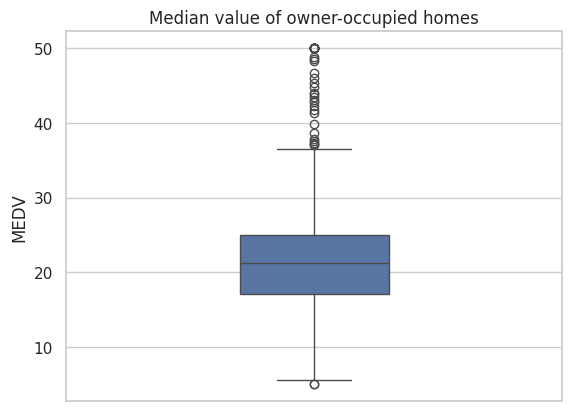

In [73]:
sns.boxplot(boston_df["MEDV"], width = 0.3)
plt.title("Median value of owner-occupied homes")
plt.show()

##### 2.2 Visualize a bar plot for the Charles river variable

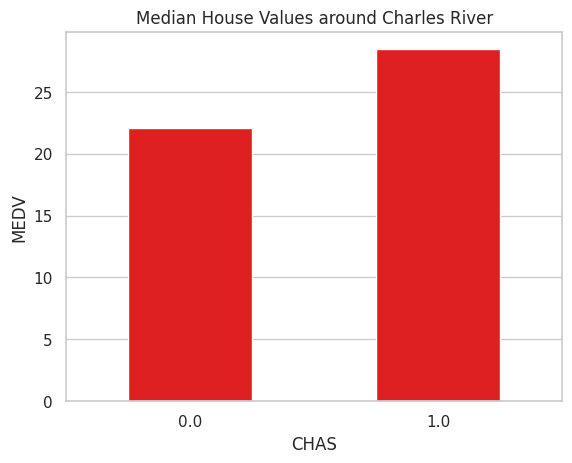

In [74]:
sns.set(style = "whitegrid")
sns.barplot(boston_df, x = boston_df["CHAS"], y = boston_df["MEDV"], errorbar=None, color = "red", width = 0.5)
plt.title("Median House Values around Charles River")
plt.show()

##### 2.3 Visualize a boxplot for the MEDV variable vs the AGE variable

In [75]:
# Discretizing the age variable in three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

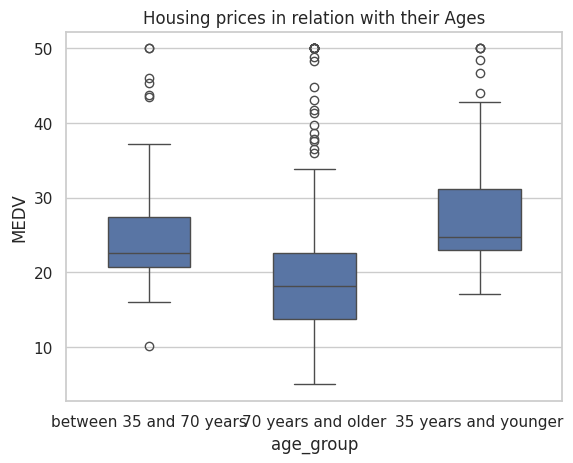

In [76]:
sns.boxplot(boston_df, x = 'age_group', y = 'MEDV', width = 0.5)
plt.title("Housing prices in relation with their Ages")
plt.show()

##### 2.4 Visualize a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

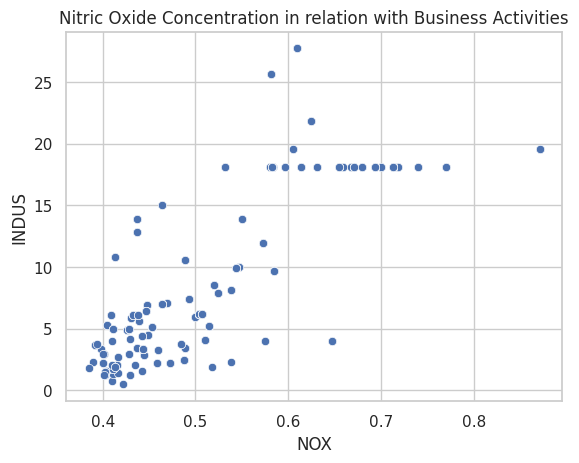

In [77]:
ax = sns.scatterplot(x = "NOX", y = "INDUS", data = boston_df)
plt.title("Nitric Oxide Concentration in relation with Business Activities")
plt.show()

##### 2.5 Visualize a histogram for the pupil to teacher ratio variable

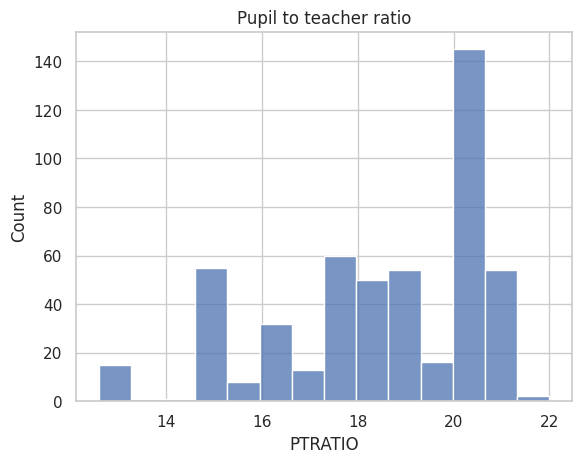

In [78]:
sns.histplot(boston_df['PTRATIO'])
plt.title("Pupil to teacher ratio")
plt.show()

# Task 3

#### 3.1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [79]:
# Numerber 0 and 1 represent near and far houses by ther Charles river.
# We can use the Levene's Test in Python to check test significance
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'], boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

P value < 0.05 then, reject the null hypothesis of equal variance.

### Hypothesis
H0 = "there is no difference in median value of houses bounded by the Charles river"
H1 = "there is a difference in median value of houses bounded by the Charles river"

In [80]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that  there a significant difference in median value of houses bounded by the Charles river


#### 3.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [81]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three age groups median values are equal)
*   $H\_1:$ At least one of the mean values is differ

#### Anova test

In [82]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that at least one of the median value differ


#### 3.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

*   $H\_0:$ There is no relationship between NOX and proportion of non-retail business
*   $H\_1:$ There is a relationship between NOX and proportion of non-retail business


In [83]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that There is a relationship between NOX and proportion of non-retail business


#### 3.4 What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

We will state the null hypothesis:

*   $H\_0: β1$ = 0 there is a impact
*   $H\_1: β1$ there is not a impact

In [84]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        18:02:19   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a relationship between house prices in Boston and their weighted distance to employment centres.